In [1]:
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot  as plt
import seaborn as sns
import pandas as pd
import numpy as np

iris = datasets.load_iris()

labels = pd.DataFrame(iris.target)
labels.columns=['labels']
data = pd.DataFrame(iris.data)
data.columns=['Sepal length','Sepal width','Petal length','Petal width']
data = pd.concat([data,labels],axis=1)

data.head()

,Sepal length,Sepal width,Petal length,Petal width,labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [2]:
feature = data[ ['Sepal length','Sepal width']]
feature.head()

,Sepal length,Sepal width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [3]:
ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k, algorithm='auto')
    model.fit(feature)
    inertias.append(model.inertia_)
    
inertias

[130.4752666666667,
 58.44759246088194,
 37.0507021276596,
 28.034982153246226,
 21.00466066066067,
 17.36509523809524,
 14.818812058040002,
 12.745845321345325,
 11.163984126984124]

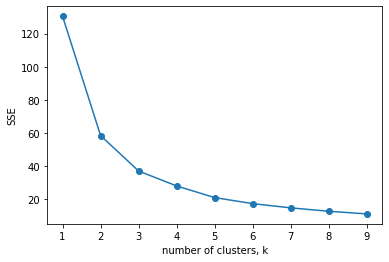

In [4]:
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('SSE')
plt.xticks(ks)
plt.show()

In [5]:
# create model and prediction
model1 = KMeans(n_clusters=3,algorithm='auto')
model1.fit(feature)
predict = pd.DataFrame(model1.predict(feature))
predict.columns=['predict']

# concatenate labels to df as a new column
r = pd.concat([feature,predict],axis=1)

print(r)

     Sepal length  Sepal width  predict
0             5.1          3.5        1
1             4.9          3.0        1
2             4.7          3.2        1
3             4.6          3.1        1
4             5.0          3.6        1
..            ...          ...      ...
145           6.7          3.0        0
146           6.3          2.5        2
147           6.5          3.0        0
148           6.2          3.4        0
149           5.9          3.0        2

[150 rows x 3 columns]


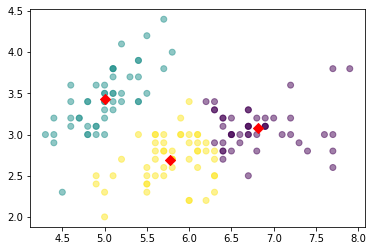

In [6]:
centers = pd.DataFrame(model1.cluster_centers_,columns=['Sepal length','Sepal width'])
center_x = centers['Sepal length']
center_y = centers['Sepal width']

# scatter plot
plt.scatter(r['Sepal length'],r['Sepal width'],c=r['predict'],alpha=0.5)
plt.scatter(center_x,center_y,s=50,marker='D',c='r')
plt.show()

In [7]:
ct = pd.crosstab(data['labels'],r['predict'])
print (ct)

predict   0   1   2
labels             
0         0  50   0
1        12   0  38
2        35   0  15


In [8]:
scaler = StandardScaler()
model2= KMeans(n_clusters=3)
pipeline = make_pipeline(scaler,model2)
pipeline.fit(feature)
predict = pd.DataFrame(pipeline.predict(feature))
predict.columns=['predict']

# concatenate labels to df as a new column
r = pd.concat([feature,predict],axis=1)

ct = pd.crosstab(data['labels'],r['predict'])
print (ct)

predict   0   1   2
labels             
0         1  49   0
1        35   0  15
2        16   0  34


In [9]:
model1.labels_, model2.labels_

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0,
        2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
        0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
        0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2,
        0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
        0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2,
        2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
        2, 0, 0, 2, 2, 2, 0, 2, 2, 

In [10]:
def k_cohesion(model1):
    X=feature.values
    total_mean=np.mean(X[:,0])
    m1=np.mean(X[model1.labels_==0,0])
    m2=np.mean(X[model1.labels_==1,0])
    m3=np.mean(X[model1.labels_==2,0])
    count1=np.count_nonzero(model1.labels_== 0)
    count2=np.count_nonzero(model1.labels_== 1)
    count3=np.count_nonzero(model1.labels_== 2)
    separation=count1*(total_mean-m1)**2+count2*(m2-total_mean)**2+count3*(m3-total_mean)**2
    print(separation)

In [11]:
k_cohesion(model1), k_cohesion(model2)

79.48477403987673
74.97783490319205


(None, None)

In [12]:
#3. 유사성 매트릭스 평가
X=feature.values
list1=[]
list1.clear()
len(X)

150

In [13]:
def s_matrix(model1):
    for i in range(0,len(X)):
        list1.append([])
        for j in range(0,len(X)):
            if model1.labels_[i]==model1.labels_[j]:
                list1[i].append(1)
            else :
                list1[i].append(0)

In [14]:
s_matrix(model1)
list1

[[1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,

In [15]:
list1.clear()
s_matrix(model2)
list1

[[1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,

In [16]:
def entropy(labels):
    """ Computes entropy of 0-1 vector. """
    n_labels = len(labels)

    if n_labels <= 1:
        return 0

    counts = np.bincount(labels)
    probs = counts[np.nonzero(counts)] / n_labels
    n_classes = len(probs)

    if n_classes <= 1:
        return 0
    return - np.sum(probs * np.log(probs)) / np.log(n_classes)

In [17]:
entropy(model1.labels_),entropy(model2.labels_)

(0.9989070566102444, 0.999638260209608)

In [18]:
feature1 = data[ ['Petal length','Petal width']]
feature1.head()

,Petal length,Petal width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [19]:
ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k, algorithm='auto')
    model.fit(feature1)
    inertias.append(model.inertia_)
    
inertias

[550.8953333333333,
 86.39021984551391,
 31.371358974358966,
 19.48300089968511,
 13.91690875790876,
 11.088890437134374,
 9.185075914423738,
 7.615402244955954,
 6.4802592066927085]

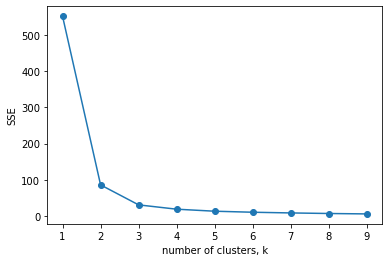

In [20]:
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('SSE')
plt.xticks(ks)
plt.show()

In [21]:
# create model and prediction
model2 = KMeans(n_clusters=3,algorithm='auto')
model2.fit(feature1)
predict = pd.DataFrame(model2.predict(feature1))
predict.columns=['predict']

# concatenate labels to df as a new column
r = pd.concat([feature1,predict],axis=1)

print(r)

     Petal length  Petal width  predict
0             1.4          0.2        0
1             1.4          0.2        0
2             1.3          0.2        0
3             1.5          0.2        0
4             1.4          0.2        0
..            ...          ...      ...
145           5.2          2.3        2
146           5.0          1.9        2
147           5.2          2.0        2
148           5.4          2.3        2
149           5.1          1.8        2

[150 rows x 3 columns]


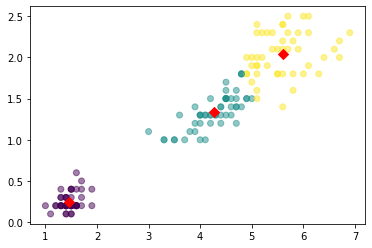

In [22]:
centers = pd.DataFrame(model2.cluster_centers_,columns=['Petal length','Petal width'])
center_x = centers['Petal length']
center_y = centers['Petal width']

# scatter plot
plt.scatter(r['Petal length'],r['Petal width'],c=r['predict'],alpha=0.5)
plt.scatter(center_x,center_y,s=50,marker='D',c='r')
plt.show()

In [23]:
model1.score(feature) 

-37.050702127659605

In [24]:
model2.score(feature1) 

-31.37135897435897

In [25]:
# 5.5     2.4        4.4      1.7

In [26]:
# 6.2      4.6       1.9      0.7

In [29]:
model2.predict([[4.4,1.7]])

array([1], dtype=int32)

In [30]:
r[r['predict']==2]

,Petal length,Petal width,predict
77,5.0,1.7,2
83,5.1,1.6,2
100,6.0,2.5,2
101,5.1,1.9,2
102,5.9,2.1,2
103,5.6,1.8,2
104,5.8,2.2,2
105,6.6,2.1,2
107,6.3,1.8,2
108,5.8,1.8,2


In [31]:
r[r['predict']==1]

,Petal length,Petal width,predict
50,4.7,1.4,1
51,4.5,1.5,1
52,4.9,1.5,1
53,4.0,1.3,1
54,4.6,1.5,1
55,4.5,1.3,1
56,4.7,1.6,1
57,3.3,1.0,1
58,4.6,1.3,1
59,3.9,1.4,1


In [32]:
r[r['predict']==0]

,Petal length,Petal width,predict
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
5,1.7,0.4,0
6,1.4,0.3,0
7,1.5,0.2,0
8,1.4,0.2,0
9,1.5,0.1,0
